# <font color='green'><b> Video editing with opencv </b></font>


In [1]:
#@title ▶️ Base dir setup
import os, sys

# check if hosted (Google VM) or running on local server
if 'google.colab' in sys.modules:
  #@markdown Google Drive root folder - hosted by Google VM (adapt to your local paths)
  from google.colab import drive
  drive.mount('/content/drive', force_remount=False)
  base_dir = 'infoMM/' #@param {type: "string"}
  base_dir  = os.path.join('/content/drive/MyDrive/', base_dir)
  #!pip install pillow  --upgrade
  img_dir = 'data/img/'
  vid_dir = 'data/video/'
  out_dir = 'output/'

  # move to base_dir
  os.chdir(base_dir)
else:
  #@markdown Path to local folder on PC (adapt to your local paths)
  img_dir = '../IMMAGINI/IMMAGINI_IN/'
  vid_dir = 'VIDEO_IN/'
  out_dir = 'VIDEO_OUT/'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from ipywidgets import interact
import ipywidgets as widgets

## <font color='green'><b> **1. Load a VIDEO** </b></font>
   

capture = `cv2.VideoCapture(filename)`


https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html#a57c0e81e83e60f36c83027dc2a188e80

**- Input parameters**

- *filename*	it can be:
  1. name of video file (eg. video.avi)
  2. or image sequence (eg. img_%02d.jpg, which will read samples like img_00.jpg, img_01.jpg, img_02.jpg, ...)
  3. or URL of video stream (eg. protocol://host:port/script_name?script_params|auth)
  4. or GStreamer pipeline string in gst-launch tool format in case if GStreamer is used as backend Note that each video stream or IP camera feed has its own URL scheme. Please refer to the documentation of source stream to know the right URL.

- *index*:	id of the video capturing device to open. To open default camera using default backend just pass 0. [with colab not so easy...]



**- Output parameter**

- *capture*: a video capture object



In [3]:
# (1) The video feed is read in as
# a VideoCapture object
cap = cv2.VideoCapture(vid_dir + 'grease_cut.mp4') #slow_traffic_small.mp4 #'BraveHeart.avi'

### <font color='green'><b> Load a folder of consecutive images </b></font>


In [4]:
# (2) OR We load a sequence of images

capture = cv2.VideoCapture(vid_dir + 'IPPR/in000%3d.jpg')
nFrames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
print("Loaded "+ str(nFrames)+ " images")

Loaded 299.0 images


In [5]:
#visualization of image sequence
def showVideo(I):

  n = len(I)

  def view_image(idx):
    plt.imshow(I[idx-1], interpolation='nearest', cmap='gray')

  interact(view_image, idx=widgets.IntSlider(min=1, max=n, step=1, value=1))

In [6]:
I = []
grabbed = True

while grabbed:
  (grabbed, frame) = capture.read()
  I.append(frame)
showVideo(I)


interactive(children=(IntSlider(value=1, description='idx', max=300, min=1), Output()), _dom_classes=('widget-…

### <font color='green'><b> **2. Read frame by frame** </b></font>


`retval, image	=	cv2.VideoCapture.read( )`

Grabs, decodes and returns the next video frame.

**Output Parameters**:

- *image*: the video frame is returned here. If no frames has been grabbed the image will be empty.

- *retval*: false if no frames has been grabbed


In [7]:
#FIND THE POSITION CORRESPONDING TO THE LAST FRAME:

def lastFrame(nomefile):
  cap = cv2.VideoCapture(vid_dir + nomefile)

  i = -1
  grabbed = True
  while grabbed:
    (grabbed, frame) = cap.read()
    i += 1

  lastFrame = i-1
  return lastFrame

f = lastFrame('grease_cut.mp4')
print("number of frames: " + str(f))

number of frames: 749


### <font color='green'><b>**3. Set/Get properties** </b></font>

  
` returns = videoID.set(propId, value)`:

` value = videoID.get(propId)`:

allow to set/get several properties

**- Input Parameters**
- *propId*:	Property identifier (eg. cv::CAP_PROP_POS_MSEC, cv::CAP_PROP_POS_FRAMES, ...)  
- *value*:	Value of the property.


**- Output Parameter**
- *returns* (set): true if the property is supported by backend used by the VideoCapture instance.
- - *value* (get):	Value of the property.

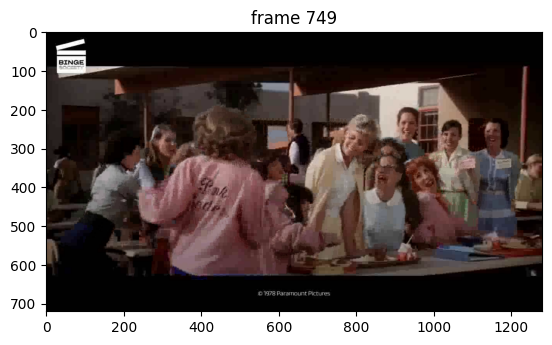

In [17]:
# GET THE LAST FRAME  AND SHOW IT:
cap.set(cv2.CAP_PROP_POS_FRAMES, f-1)
(grabbed, frame) = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.title("frame "+ str(f))
plt.show()

### <font color='green'><b>-  EXERCISE 1: </b></font>

Investigate the function `cap.get()` and find the way to call it in order to have the number of frame in the video.
Then simplify the cell above in order to directly print the last video frame


In [9]:
 # TO DO
cap.get(cv2.CAP_PROP_FRAME_COUNT)

750.0

# **- Capturing an image from your local webcam in VS code**

In [19]:
# Apri la connessione alla webcam
cap = cv2.VideoCapture(0)  # 0 indica la webcam predefinita, potrebbe variare a seconda del tuo sistema

while True:
    # Leggi un frame dalla webcam
    ret, frame = cap.read()

    # Mostra il frame acquisito
    cv2.imshow('Webcam', frame)

    # Esci dal loop quando si preme 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Rilascia la risorsa della webcam e chiudi la finestra
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

==============
# **- Capturing an image from your local webcam in Colab**

For capturing video from a webcome  outside Colab, you just have to call:

cap = cv2.VideoCapture(0)

In Colab it's much more complicate, but you can execute the code below for the purpose:

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))